In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install pandas pyphen nltk pandas_profiling beautifulsoup4 seaborn

In [3]:
import operator
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import pyphen

from bs4 import BeautifulSoup
import pandas_profiling

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# EDA

In [4]:
df = pd.read_csv("data/stories.csv")

In [5]:
df.head()

,Unnamed: 0,story_id,title,english_title,reading_level_updated,story_langugage,synopsis,content,category_name,tag_name,story_original_title
0,0,1,वह हँस दिया,Veh Hans Diyaa,L1,Hindi,क्‍या आपको दौड़ लगाने में मज़ा आता है? हमारी कहा...,Kitchenvadoekdiscl ClothesT-hemp&nbsp;&nbsp;&n...,"Fiction, Family & Friends, Animal Stories",NaN,वह हँस दिया
1,1,2,Smile Please!,Smile Please!,L1,English,Follow the young deer as he races along with f...,A fawn was racing in the forest. He was ahead ...,"Fiction, Family & Friends, Animal Stories, Ani...",NaN,वह हँस दिया
2,5,7,Fat King Thin Dog,Fat King Thin Dog,L1,English,Run along with the Fat King after the Thin Dog!,This is a fat king. The fat king has a thin do...,"Fiction, Funny, Animal Stories",NaN,Fat King Thin Dog
3,6,8,मोटा राजा दुबला कुत्ता,Mota Raja Dubla Kutta,L1,Hindi,मोटे राजा के साथ दुबले कुत्ते के पीछे भागिये!\r\n,यह है मोटा राजा। मोटे राजा का है दुबला कुत्ता...,"Fiction, Funny, Animal Stories, Animal Stories...",NaN,Fat King Thin Dog
4,14,16,"Vayu, the Wind","Vayu, the Wind",L2,English,A nice story about this silent and always pres...,"Everytime I finish my hot, hot bath,My wet bod...","Science & Nature, Poems, Poems, Science & Nature",NaN,वारा


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,story_id,title,english_title,reading_level_updated,story_langugage,synopsis,content,category_name,tag_name,story_original_title
0,1,वह हँस दिया,Veh Hans Diyaa,L1,Hindi,क्‍या आपको दौड़ लगाने में मज़ा आता है? हमारी कहा...,Kitchenvadoekdiscl ClothesT-hemp&nbsp;&nbsp;&n...,"Fiction, Family & Friends, Animal Stories",NaN,वह हँस दिया
1,2,Smile Please!,Smile Please!,L1,English,Follow the young deer as he races along with f...,A fawn was racing in the forest. He was ahead ...,"Fiction, Family & Friends, Animal Stories, Ani...",NaN,वह हँस दिया
2,7,Fat King Thin Dog,Fat King Thin Dog,L1,English,Run along with the Fat King after the Thin Dog!,This is a fat king. The fat king has a thin do...,"Fiction, Funny, Animal Stories",NaN,Fat King Thin Dog
3,8,मोटा राजा दुबला कुत्ता,Mota Raja Dubla Kutta,L1,Hindi,मोटे राजा के साथ दुबले कुत्ते के पीछे भागिये!\r\n,यह है मोटा राजा। मोटे राजा का है दुबला कुत्ता...,"Fiction, Funny, Animal Stories, Animal Stories...",NaN,Fat King Thin Dog
4,16,"Vayu, the Wind","Vayu, the Wind",L2,English,A nice story about this silent and always pres...,"Everytime I finish my hot, hot bath,My wet bod...","Science & Nature, Poems, Poems, Science & Nature",NaN,वारा


In [8]:
df = df.rename(columns={'story_langugage': 'story_language'})

In [9]:
for col in ['story_language', 'category_name', 'tag_name']:
    u_values = df[col].unique() 
    print(col, u_values, len(u_values))

story_language ['Hindi' 'English' 'Telugu'] 3
category_name ['Fiction, Family & Friends, Animal Stories'
 'Fiction, Family & Friends, Animal Stories, Animal Stories, Family & Friends, Fiction'
 'Fiction, Funny, Animal Stories' ... 'Non-fiction, Poems'
 'Adventure & Mystery, Fantasy, Fiction, Series'
 'Fantasy, Funny, Poems, Non-fiction, Read-Aloud Stories'] 1098
tag_name [nan 'fiction, read aloud stories' 'Pehelwaan Garu, ji' ... 'super hero'
 'poem, poems, buddha, silence, spiritual, spirituality, meditation, wisdom'
 'politics, nature, rhyme'] 2120


In [10]:
categories = set()
for values in df['category_name'].unique():
    for v in values.split(','):
        categories.add(v.strip())

In [11]:
categories, len(categories)

({'Activity Books',
  'Adventure & Mystery',
  'Animal Stories',
  'Biographies',
  'Family & Friends',
  'Fantasy',
  'Fiction',
  'Flashcards',
  'Folktales & Myths',
  'Funny',
  'Growing Up',
  'History',
  'Lifeskills',
  'Math',
  'Non-fiction',
  'Place & Culture',
  'Plays',
  'Poems',
  'Read-Aloud Stories',
  'RetellRemixRejoice2016entry',
  'RetellRemixRejoice2017entry',
  'STEM',
  'Scary',
  'School Stories',
  'Science & Nature',
  'Series',
  'Spotting Books',
  'Story Card',
  'Wordless Stories'},
 29)

### Create Binary Category Attributes

In [12]:
for cat in categories:
    df[cat] = df.apply(lambda x: cat in x['category_name'], axis=1)

In [13]:
df = df.drop('category_name', axis=1)

In [14]:
df.head()

,story_id,title,english_title,reading_level_updated,story_language,synopsis,content,tag_name,story_original_title,Scary,...,STEM,Folktales & Myths,Story Card,Growing Up,Animal Stories,Family & Friends,Wordless Stories,Non-fiction,School Stories,Spotting Books
0,1,वह हँस दिया,Veh Hans Diyaa,L1,Hindi,क्‍या आपको दौड़ लगाने में मज़ा आता है? हमारी कहा...,Kitchenvadoekdiscl ClothesT-hemp&nbsp;&nbsp;&n...,NaN,वह हँस दिया,False,...,False,False,False,False,True,True,False,False,False,False
1,2,Smile Please!,Smile Please!,L1,English,Follow the young deer as he races along with f...,A fawn was racing in the forest. He was ahead ...,NaN,वह हँस दिया,False,...,False,False,False,False,True,True,False,False,False,False
2,7,Fat King Thin Dog,Fat King Thin Dog,L1,English,Run along with the Fat King after the Thin Dog!,This is a fat king. The fat king has a thin do...,NaN,Fat King Thin Dog,False,...,False,False,False,False,True,False,False,False,False,False
3,8,मोटा राजा दुबला कुत्ता,Mota Raja Dubla Kutta,L1,Hindi,मोटे राजा के साथ दुबले कुत्ते के पीछे भागिये!\r\n,यह है मोटा राजा। मोटे राजा का है दुबला कुत्ता...,NaN,Fat King Thin Dog,False,...,False,False,False,False,True,False,False,False,False,False
4,16,"Vayu, the Wind","Vayu, the Wind",L2,English,A nice story about this silent and always pres...,"Everytime I finish my hot, hot bath,My wet bod...",NaN,वारा,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
cat2counts = {cat: df[cat].value_counts()[1] for cat in categories}
cat2counts = dict(sorted(cat2counts.items(), key=operator.itemgetter(1), reverse=True))

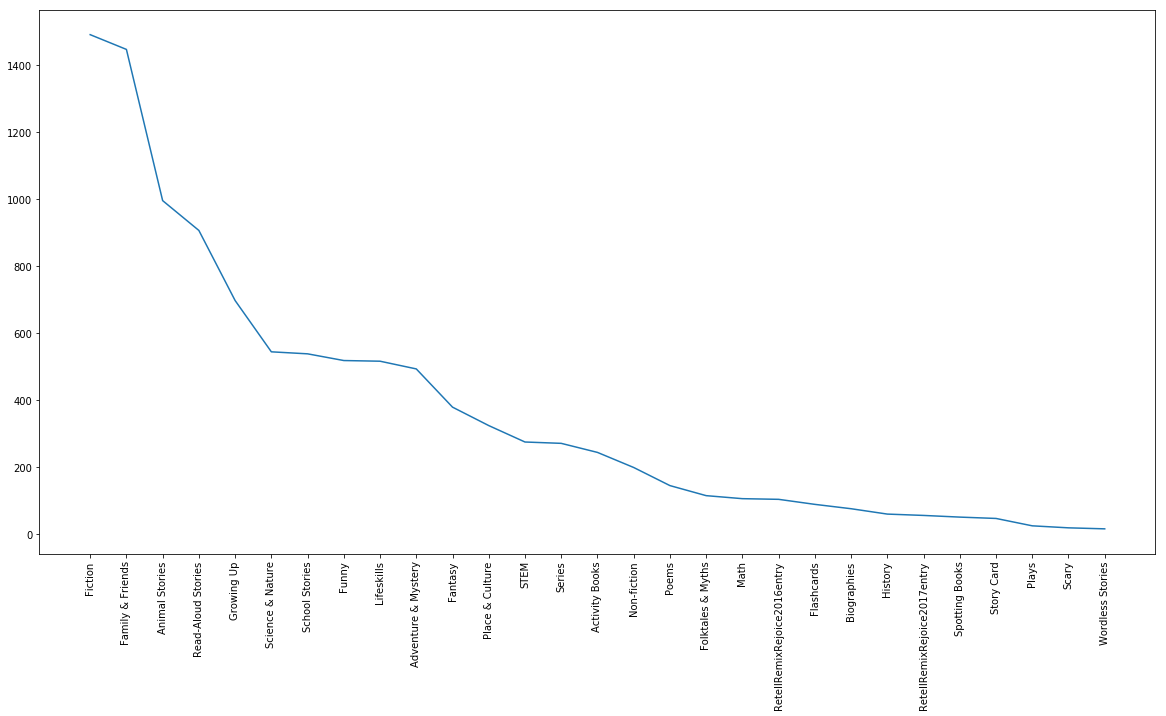

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(cat2counts.keys(), cat2counts.values())
plt.xticks(rotation=90)
plt.show()

# Reading Level

In [17]:
# Convert reading level to int
df['reading_level'] = df.apply(lambda row: int(row['reading_level_updated'][1:]), axis=1)
df = df.drop('reading_level_updated', axis=1)

In [18]:
df['reading_level'].describe()

count    3697.000000
mean        1.896402
std         0.935316
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: reading_level, dtype: float64

In [19]:
gp = df[['reading_level', 'story_language']].groupby('story_language')

In [20]:
gp.mean()

,reading_level
story_language,
English,1.863954
Hindi,1.914130
Telugu,2.078488


In [21]:
gp.std()

,reading_level
story_language,
English,0.905931
Hindi,0.975330
Telugu,1.008536


In [22]:
gp.count()

,reading_level
story_language,
English,2433
Hindi,920
Telugu,344


In [23]:
pandas_profiling.ProfileReport(df)

Number of variables,38
Number of observations,3697
Total Missing (%),2.2%
Total size in memory,364.7 KiB
Average record size in memory,101.0 B
Numeric,2
Categorical,7
Boolean,29
Date,0
Text (Unique),0
Rejected,0


In [24]:
# Remove rows with no content
for i, row in df.iterrows():
    if pd.isnull(row.content):
        df = df.drop(i)

In [25]:
len(df)

3640

# Reading Complexity

Count syllables for hindi. This is taken from https://pandey.github.io/posts/tokenize-indic-syllables-python.html.

In [27]:
vowels = '\u0904-\u0914\u0960-\u0961\u0972-\u0977'
consonants = '\u0915-\u0939\u0958-\u095F\u0978-\u097C\u097E-\u097F'
glottal = '\u097D'

vowel_signs = '\u093E-\u094C\u093A-\u093B\u094E-\u094F\u0955-\u0957\u1CF8-\u1CF9'
nasals = '\u0900-\u0902\u1CF2-\u1CF6'
visarga = '\u0903'
nukta = '\u093C'
avagraha = '\u093D'
virama = '\u094D'

vedic_signs = '\u0951-\u0952\u1CD0-\u1CE1\u1CED'
visarga_modifiers = '\u1CE2-\u1CE8'
combining = '\uA8E0-\uA8F1'

om = '\u0950'

accents = '\u0953-\u0954'
dandas = '\u0964-\u0965'
digits = '\u0966-\u096F'
abbreviation = '\u0970'
spacing = '\u0971'

vedic_nasals = '\uA8F2-\uA8F7\u1CE9-\u1CEC\u1CEE-\u1CF1'
fillers = '\uA8F8-\uA8F9'
caret = '\uA8FA'
headstroke = '\uA8FB'

space = '\u0020'
joiners = '\u200C-\u200D'

def syllabifyHindi(inputtext):

    syllables = []
    curr = ''

    # iterate over each character in the input. if a char belongs to a 
    # class that can be part of a syllable, then add it to the curr 
    # buffer. otherwise, output it to syllables[] right away.

    for char in inputtext:

        if re.match('[' + vowels + avagraha + glottal + om + ']', char):

            # need to handle non-initial independent vowel letters,
            # avagraha, and om

            if curr != '':
                syllables.append(curr)
                curr = char
            else:
                curr = curr + char

        elif re.match('[' + consonants + ']', char):

            # if last in curr is not virama, output curr as syllable
            # else add present consonant to curr

            if len(curr) > 0 and curr[-1] != virama:
                syllables.append(curr)
                curr = char
            else:
                curr = curr + char

        elif re.match('[' + vowel_signs + visarga + vedic_signs + ']', char):
            curr = curr + char

        elif re.match('[' + visarga_modifiers + ']', char):

            if len(curr) > 0 and curr[-1] == visarga:
                curr = curr + char
                syllables.append(curr)
                curr = ''
            else:
                syllables.append(curr)
                curr = ''

        elif re.match('[' + nasals + vedic_nasals + ']', char):

            # if last in curr is a vowel sign, output curr as syllable
            # else add present vowel modifier to curr and output as syllable

            vowelsign = re.match('[' + vowel_signs + ']$', curr)
            if vowelsign:
                syllables.append(curr)
                curr = ''
            else:
                curr = curr + char
                syllables.append(curr)
                curr = ''

        elif re.match('[' + nukta + ']', char):
            curr = curr + char

        elif re.match('[' + virama + ']', char):
            curr = curr + char

        elif re.match('[' + digits + ']', char):
            curr = curr + char

        elif re.match('[' + fillers + headstroke + ']', char):
            syllables.append(char)

        elif re.match('[' + joiners + ']', char):
            curr = curr + char

        else:
            pass
            #print ("unhandled: " + char + " ", char.encode('unicode_escape'))

    # handle remaining curr
    if curr != '':
        syllables.append(curr)
        curr = ''

    # return each syllable as item in a list
    return syllables

In [28]:
PURNVIRAM = '।'

In [29]:
dic_en = pyphen.Pyphen(lang='en') # Use to get syllable counts of english words
dic_te = pyphen.Pyphen(lang='te') # Use to get syllable counts of telugu words

In [30]:
def get_text_features(row):
    text = row.content
    lang = row['story_language']
    if pd.isnull(text):
        row['avg_words_per_sent'] = 0
        row['avg_word_len'] = 0
        row['total_num_words'] = 0
        row['avg_sylls_per_word'] = 0
        row['num_poly_sylls'] = 0
        row['num_mono_sylls'] = 0
        row['num_sents'] = 0
        return row

    if lang == 'English':
        sents = nltk.sent_tokenize(text)
    elif lang == 'Hindi':
        sents = [sent.strip() for sent in text.replace('!', PURNVIRAM).split(PURNVIRAM)]
    elif lang == 'Telugu':
        sents = [sent.strip() for sent in text.replace('!', '?').replace('.', '?').split('?')] # TODO: Bad Hack!
    
    num_words_in_sent = [] 
    num_sylls_in_word = []
    word_lens = []
    for sent in sents:
        if lang == 'English':
            words = nltk.word_tokenize(sent)[:-1]
        elif lang == 'Hindi' or lang == 'Telugu':
            words = sent.split()
        word_lens.extend([len(word) for word in words])
        num_words_in_sent.append(len(words))
        if lang == 'English':
            num_sylls_in_word.extend([len(dic_en.inserted(word).split('-')) for word in words])
        if lang == 'English':
            num_sylls_in_word.extend([len(dic_te.inserted(word).split('-')) for word in words])
        elif lang == 'Hindi':
            num_sylls_in_word.extend([len(syllabifyHindi(word)) for word in words])
                    
    avg_words_per_sent = np.average(num_words_in_sent) if num_words_in_sent else 0
    total_num_words = np.sum(num_words_in_sent) if num_words_in_sent else 0
    avg_sylls_per_word = np.average(num_sylls_in_word) if num_sylls_in_word else 0
    num_sents = len(sents)
    avg_word_len = np.average(word_lens) if word_lens else 0
    
    num_poly_sylls = 0 # words with more than 2 syllables
    num_mono_sylls = 0
    for num_sylls in num_sylls_in_word:
        if num_sylls > 2:
            num_poly_sylls += 1
        else:
            num_mono_sylls += 1
            
    row['avg_words_per_sent'] = avg_words_per_sent
    row['avg_word_len'] = avg_word_len
    row['total_num_words'] = total_num_words
    row['avg_sylls_per_word'] = avg_sylls_per_word
    row['num_poly_sylls'] = num_poly_sylls
    row['num_mono_sylls'] = num_mono_sylls
    row['num_sents'] = num_sents
    
    return row

In [31]:
df = df.apply(get_text_features, axis=1)
df['content_len'] = df.apply(lambda row: 0 if pd.isnull(row.content) else len(row.content), axis=1)

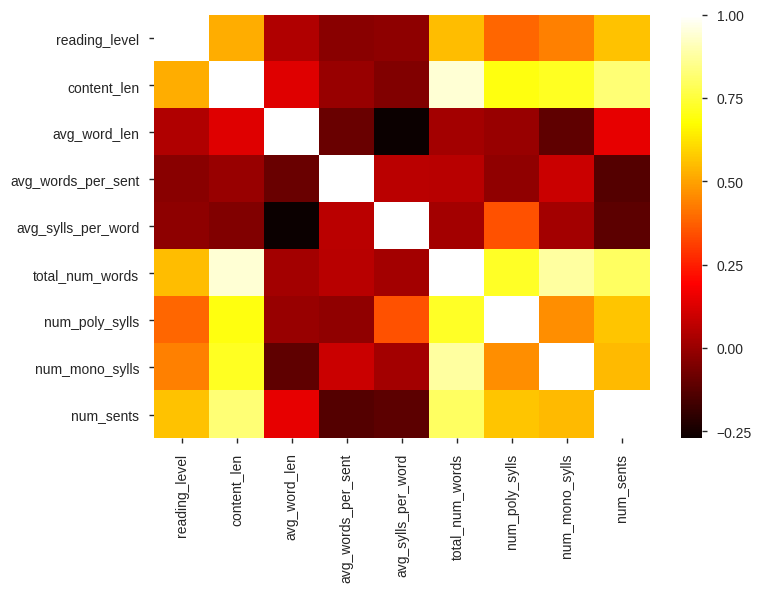

In [32]:
corr = df[['reading_level', 
        'content_len', 
        'avg_word_len',
        'avg_words_per_sent',
        'avg_sylls_per_word',
        'total_num_words',
        'num_poly_sylls',
        'num_mono_sylls',
        'num_sents']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='hot')

### Readability Indices

In [33]:
def smog_grade(row, thresh=3):
    "Approximation of https://tinyurl.com/y53mkrbp"
    return np.sqrt(row['num_poly_sylls']) + 3

For the next three indices see pg 14 of https://tinyurl.com/y23zdnbb

In [34]:
def ARI(row):
    "Automated Readilibity Index"
    return 0.4 * row['avg_words_per_sent'] + 6 * row['avg_word_len'] - 27.4

In [35]:
def fog_count(row):
    if not row['num_sents']:
        return 0
    return (((row['num_mono_sylls'] + row['num_poly_sylls']) / row['num_sents']) - 3) / 2          

In [36]:
def flesch_score(row):
    return 0.4 * row['avg_words_per_sent'] + 12 * row['avg_sylls_per_word'] - 16

In [37]:
df['smog_grade'] = df.apply(lambda row: smog_grade(row), axis=1)
df['ARI'] = df.apply(lambda row: ARI(row), axis=1)
df['fog_count'] = df.apply(lambda row: fog_count(row), axis=1)
df['flesch_score'] = df.apply(lambda row: flesch_score(row), axis=1)

In [38]:
df[['reading_level', 'smog_grade', 'ARI', 'fog_count', 'flesch_score', 'content_len']].corr()

,reading_level,smog_grade,ARI,fog_count,flesch_score,content_len
reading_level,1.000000,0.462322,-0.012002,-0.025867,-0.031896,0.523388
smog_grade,0.462322,1.000000,-0.025374,-0.046372,0.134419,0.589684
ARI,-0.012002,-0.025374,1.000000,0.889679,0.885058,0.046943
fog_count,-0.025867,-0.046372,0.889679,1.000000,0.928293,-0.009645
flesch_score,-0.031896,0.134419,0.885058,0.928293,1.000000,-0.012262
content_len,0.523388,0.589684,0.046943,-0.009645,-0.012262,1.000000


### Can we classify Reading Level?

In [39]:
np.random.seed = 42
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [40]:
len(train), len(test)

(2882, 758)

In [41]:
feat_cols = [col for col in train.columns if train[col].dtype != np.object
                                          and col not in ['reading_level', 'story_id']]

In [42]:
X_train = train[feat_cols]
y_train = train['reading_level']
X_test = test[feat_cols]
y_test = test['reading_level']

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [44]:
confusion_matrix(y_pred, y_test)

array([[264, 112,  17,   6],
       [ 38, 140,  67,  14],
       [  0,  11,  40,  23],
       [  2,   2,   6,  16]])

In [45]:
accuracy_score(y_pred, y_test)

0.6068601583113457

Look at important features

In [57]:
coefs = logreg.coef_ 
imp_features = np.argsort(np.average(np.abs(coefs), axis=0) * np.std(X_train, 0))

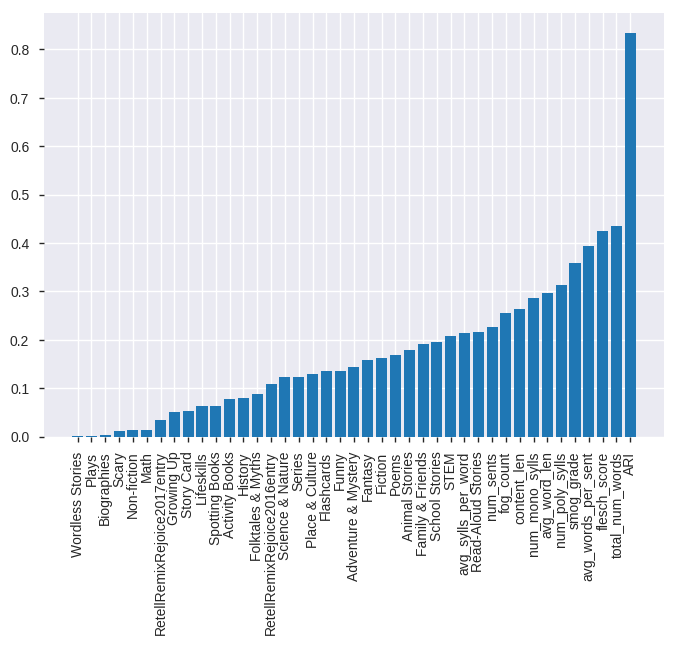

In [58]:
plt.bar(np.array(feat_cols)[imp_features], np.sort(np.average(np.abs(coefs), axis=0)))
plt.xticks(rotation=90)
plt.show()